In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Bts usd/BTC-USD Training Data - 1st Jan 2016 to 1st Jan 2022.csv')                    
df1.head()  

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [4]:
df2 = pd.read_csv('/content/drive/MyDrive/Bts usd/BTC-USD Out of Time Testing 1st Jan 2022 to 4th Feb 2022.csv')
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
1,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188,46458.117188,33071628362
3,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
4,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859


In [11]:
final_df = pd.concat([df1, df2], ignore_index=True)  

In [ ]:
#Now save the Dataframe into the Final preprocessed_data file.

In [13]:
#Now save the Dataframe into the Final preprocessed_data file.
final_df.to_csv("/content/drive/MyDrive/Bts usd/final_df.csv",index=False)

In [14]:
final_df = pd.read_csv("/content/drive/MyDrive/Bts usd/final_df.csv")

In [15]:
final_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [16]:
final_df.set_index("Date",inplace=True)

In [17]:
final_df.shape

(2228, 6)

In [18]:
final_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2.228000e+03
mean,13445.026206,13806.843200,13043.509117,13460.158516,13460.158516,1.774999e+10
std,16721.478048,17170.695832,16198.653157,16723.528378,16723.528378,2.079395e+10
min,365.072998,374.950012,354.914001,364.330994,364.330994,2.851400e+07
25%,2676.954956,2763.644959,2576.104980,2670.775024,2670.775024,1.234932e+09
50%,7468.564941,7637.985108,7324.726075,7476.364991,7476.364991,9.833027e+09
75%,11557.909180,11880.472656,11290.747070,11586.823242,11586.823242,2.898932e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [19]:
#Checking whether there are any rows with null values
nan_rows = final_df[final_df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


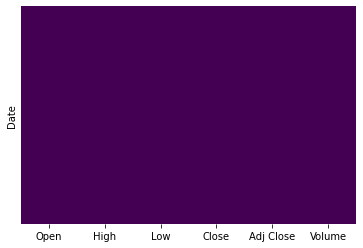

In [20]:
sns.heatmap(final_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2228 entries, 2016-01-01 to 2022-02-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2228 non-null   float64
 1   High       2228 non-null   float64
 2   Low        2228 non-null   float64
 3   Close      2228 non-null   float64
 4   Adj Close  2228 non-null   float64
 5   Volume     2228 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 121.8+ KB


In [22]:
final_df['Open'].value_counts()

46311.746094    2
17760.300781    2
9292.841797     1
9344.683594     1
9389.820313     1
               ..
16476.199219    1
17527.300781    1
17462.099609    1
15477.200195    1
37234.058594    1
Name: Open, Length: 2226, dtype: int64

In [ ]:
final_df['Close'].value_counts()

47686.812500    2
6741.750000     2
1179.969971     2
9358.589844     1
8406.515625     1
               ..
16477.599609    1
17527.000000    1
17429.500000    1
15599.200195    1
37649.335938    1
Name: Close, Length: 2225, dtype: int64

In [ ]:
final_df['High'].value_counts()

47827.312500    2
6536.919922     2
8745.590820     1
8792.994141     1
8687.747070     1
               ..
17712.400391    1
17705.199219    1
15739.700195    1
15572.799805    1
38121.738281    1
Name: High, Length: 2226, dtype: int64

In [24]:
# dropping duplicate values
final_df.drop_duplicates(keep=False,inplace=True)

In [25]:
# Selecting duplicate rows except first 
# occurrence based on all columns
duplicate = final_df[final_df.duplicated()]
  
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [26]:
import warnings
warnings.filterwarnings("ignore")

Plotting distribution of variable:

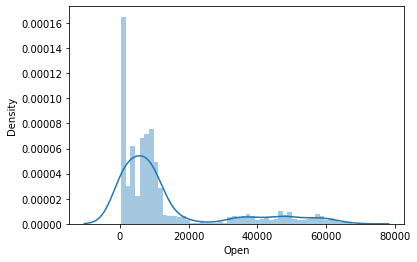

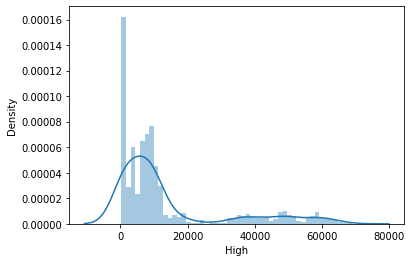

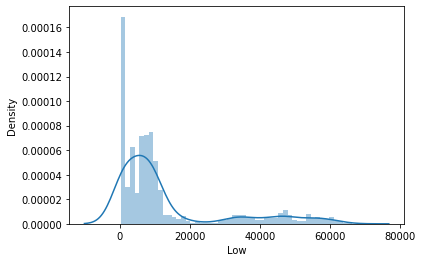

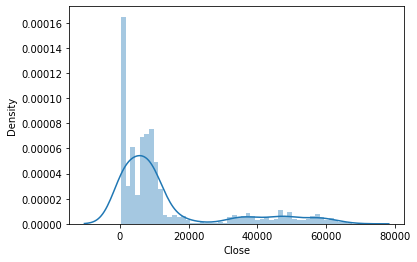

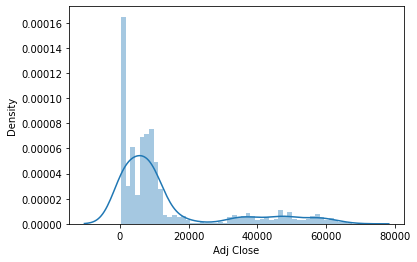

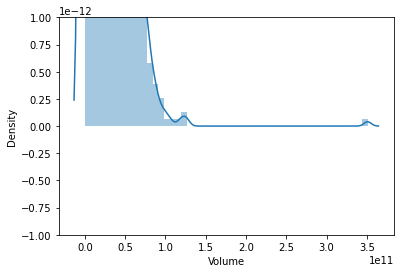

In [27]:
columns = ['Open','High','Low','Close','Adj Close','Volume']
for i in columns:
    plt.figure()
    sns.distplot(final_df[i])

<h2>Corelation matrix:

In [28]:
final_df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999488,0.998996,0.998718,0.998718,0.701194
High,0.999488,1.000000,0.998939,0.999432,0.999432,0.705154
Low,0.998996,0.998939,1.000000,0.999335,0.999335,0.692778
Close,0.998718,0.999432,0.999335,1.000000,1.000000,0.699992
Adj Close,0.998718,0.999432,0.999335,1.000000,1.000000,0.699992
Volume,0.701194,0.705154,0.692778,0.699992,0.699992,1.000000


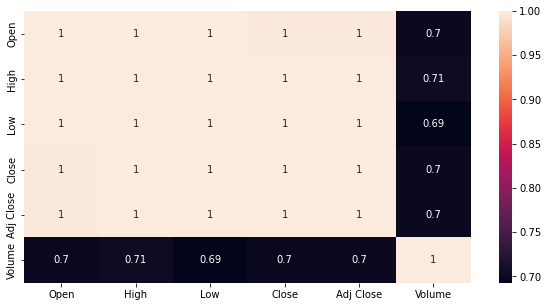

In [29]:
cor = final_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cor,annot=True)

<h3>Observation:

- as we seen above corelation matrix we see that all the variable with volume have less corelated than other.
- all other varible are highly corelated with  each other

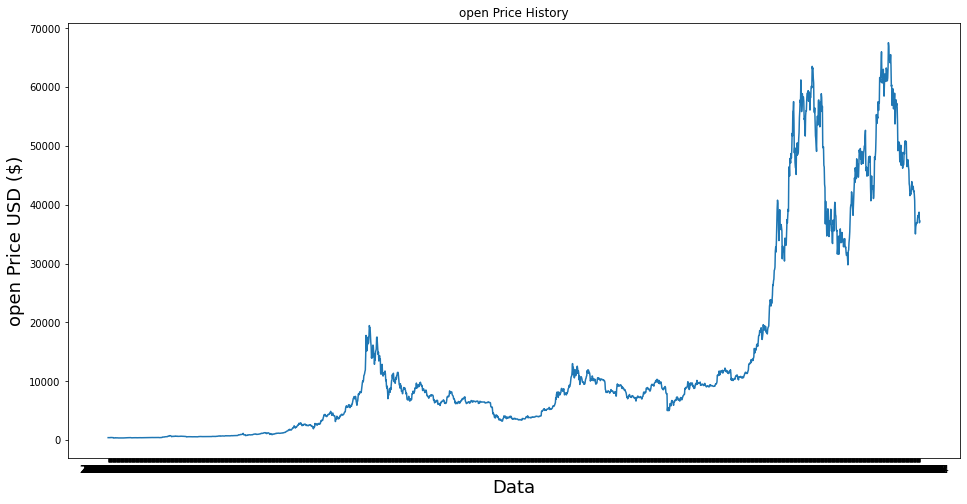

In [30]:
plt.figure(figsize=(16,8))
plt.title('open Price History')
plt.plot(final_df['Open'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('open Price USD ($)', fontsize=18)
plt.show()

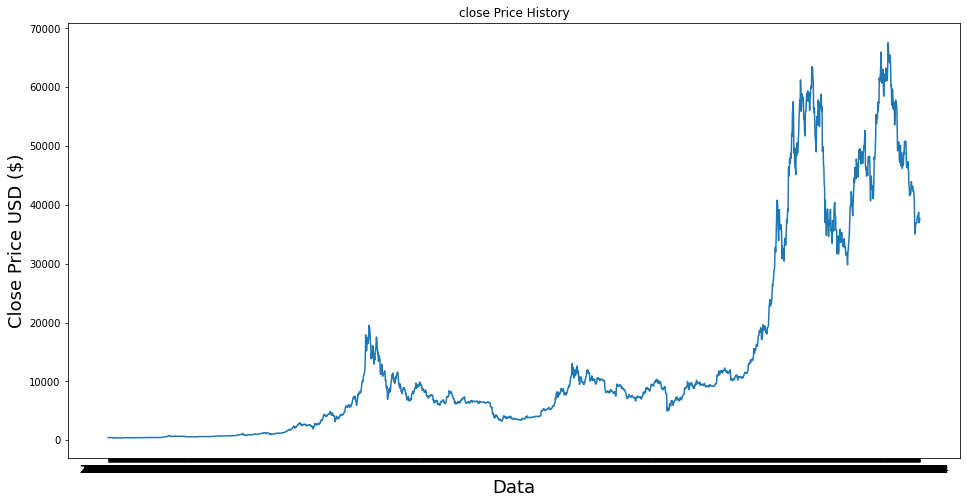

In [31]:
plt.figure(figsize=(16,8))
plt.title('close Price History')
plt.plot(final_df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

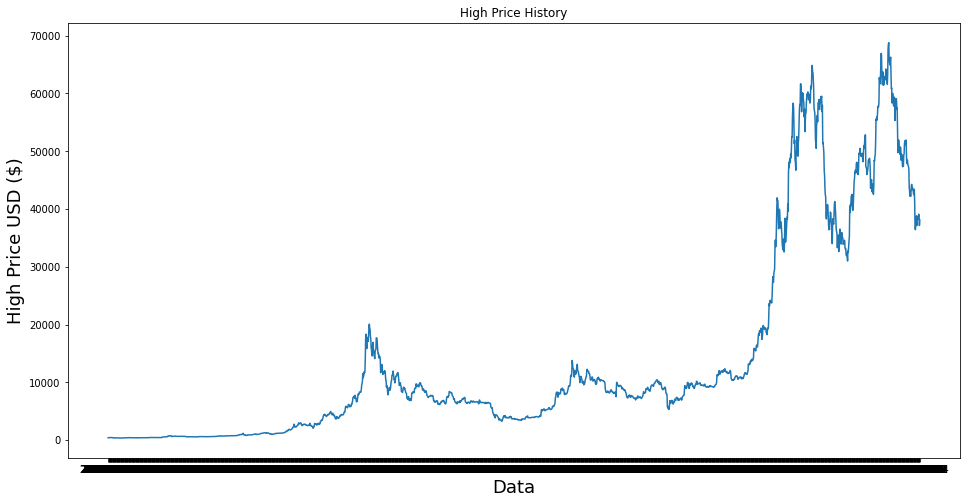

In [32]:
plt.figure(figsize=(16,8))
plt.title('High Price History')
plt.plot(final_df['High'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('High Price USD ($)', fontsize=18)
plt.show()

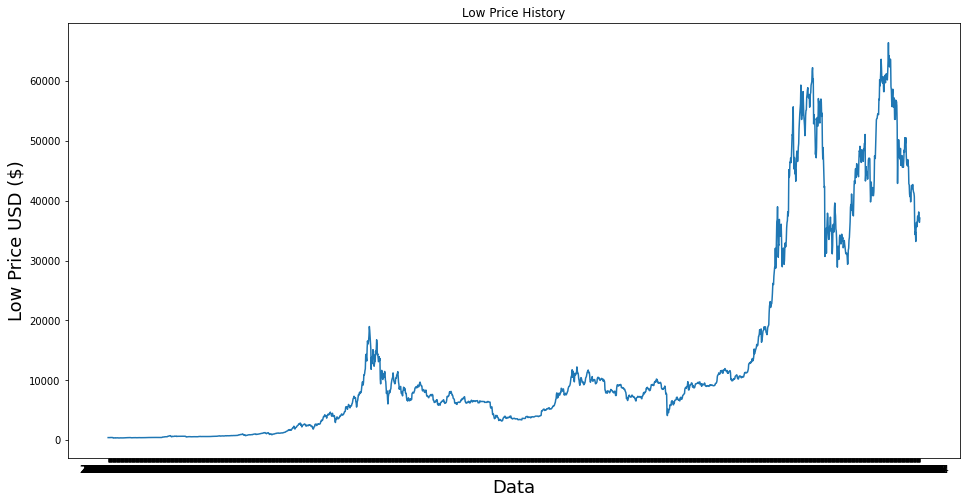

In [33]:
plt.figure(figsize=(16,8))
plt.title('Low Price History')
plt.plot(final_df['Low'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Low Price USD ($)', fontsize=18)
plt.show()

<Figure size 216x216 with 0 Axes>

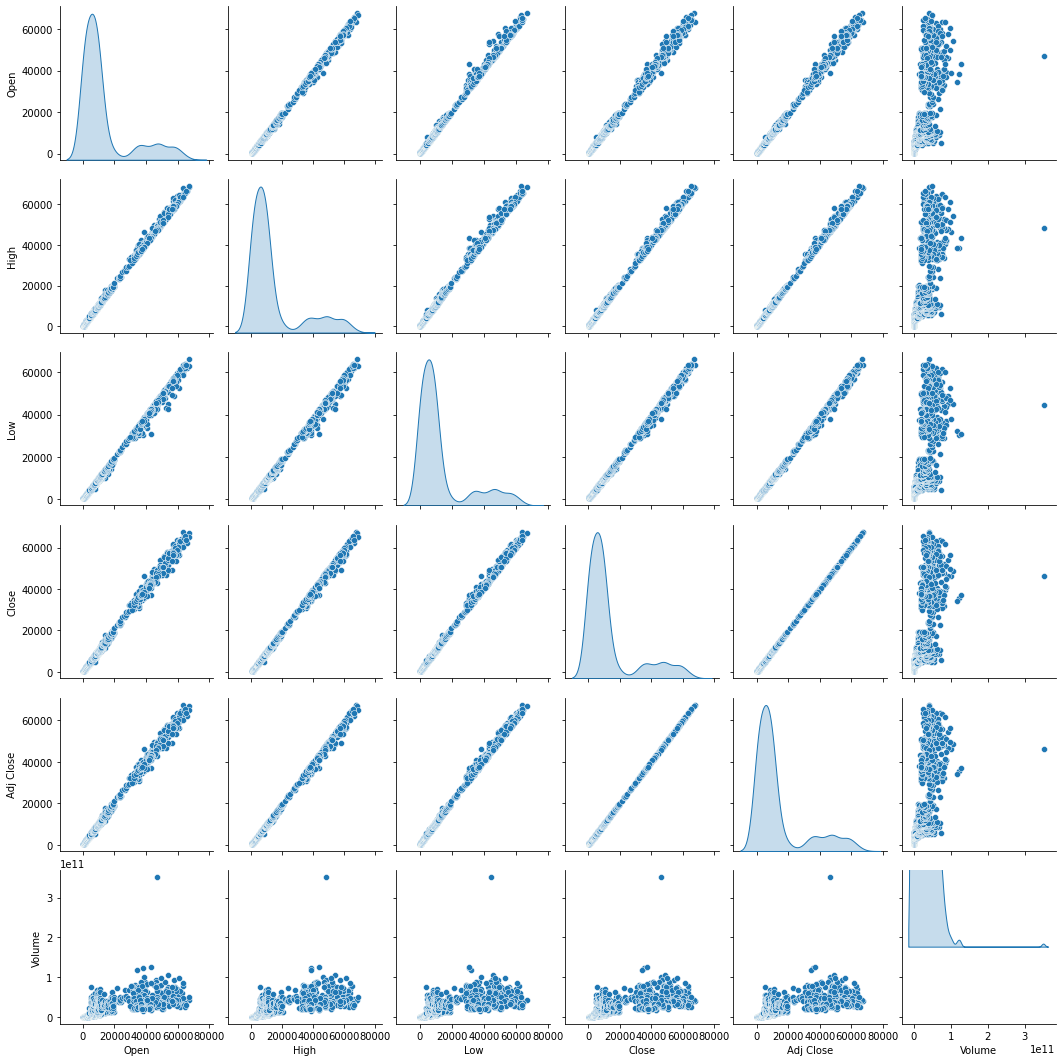

In [ ]:
plt.figure(figsize=(3,3))
sns.pairplot(final_df,diag_kind='kde')
plt.show()

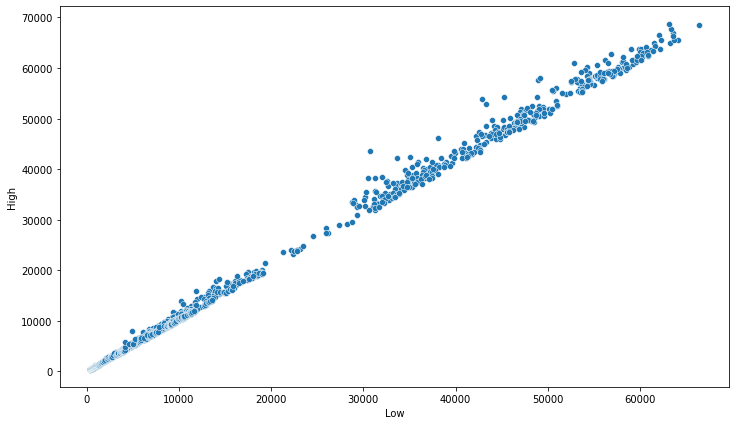

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Low',y='High',data=final_df)

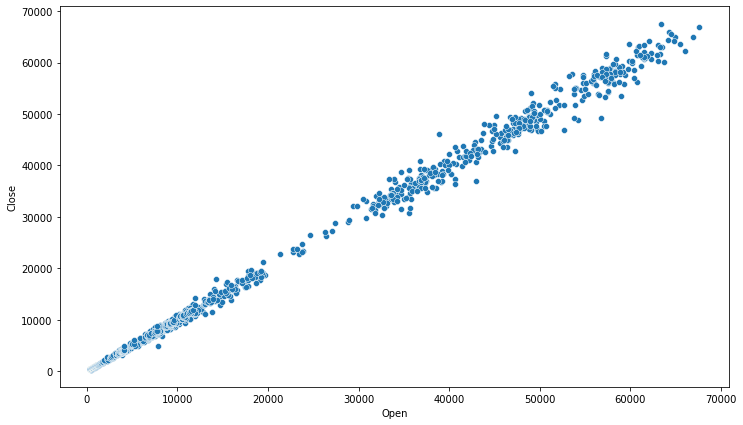

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Open',y='Close',data=final_df)

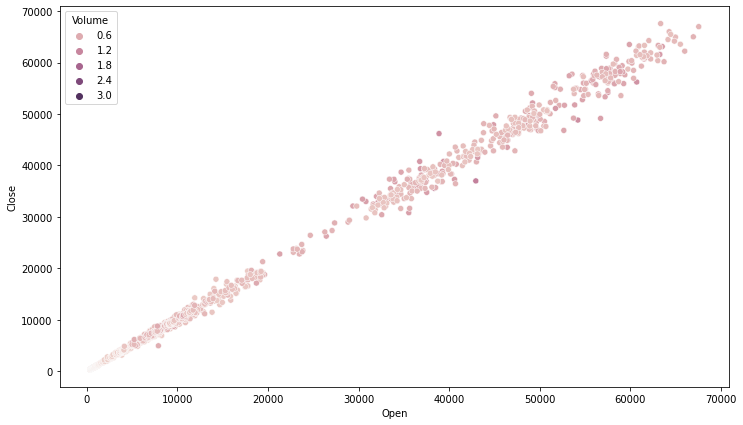

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Open',y='Close',hue='Volume',data=final_df)

<h3>Select Subset with relevant features

- We use the daily closing price Close as the value to predict, so we can discard the other features.

- 'Close' column has numerical data type
- The 'Date' is the index column and contains datetime values

In [ ]:
# Create a new DataFrame with only closing price and date
df = pd.DataFrame(final_df, columns=['Close'])

# Reset index column so that we have integers to represent time for later analysis
df = df.reset_index()

In [ ]:
df.head()

,Date,Close
0,2016-01-01,434.334015
1,2016-01-02,433.437988
2,2016-01-03,430.010986
3,2016-01-04,433.091003
4,2016-01-05,431.959991


In [ ]:
# Check data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2227 non-null   datetime64[ns]
 1   Close   2227 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.9 KB


<h3>Training a Linear Regression Model

Train Test Split

In [ ]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

In [ ]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [ ]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [ ]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  20.247666161365004
Intercept:  -9060.165316671293


<h3>Interpreting the coefficients:

- The slope coefficient tells us that with a 1 unit increase in date the closing price increases by 20.24766 $
- The intercept coefficient is the price at wich the closing price measurement started, the stock price value at date zero

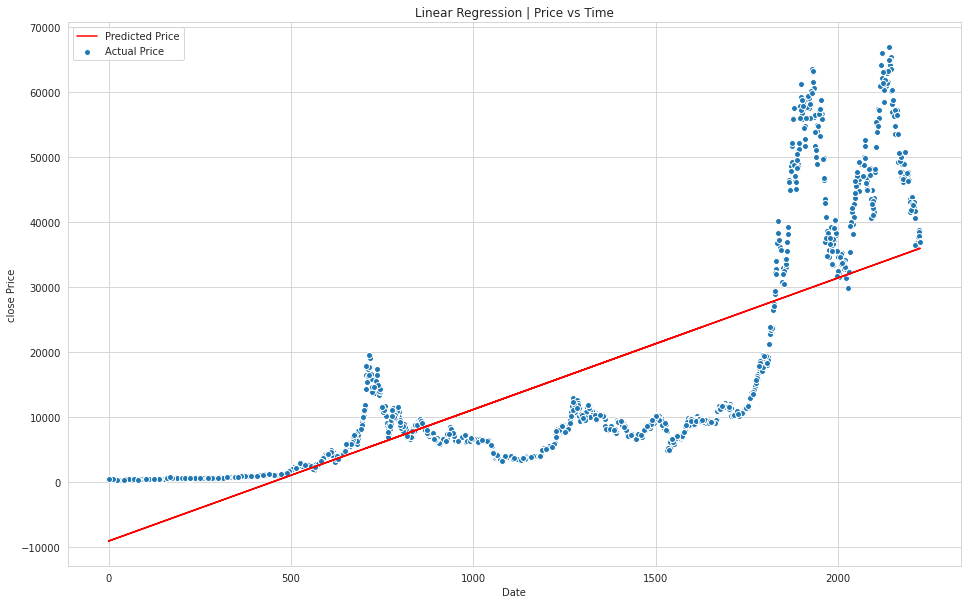

In [ ]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('close Price')
plt.legend()
plt.show()

In [ ]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [ ]:
# Generate array with predicted values
y_pred = model.predict(X_test)

In [ ]:
# Add new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

In [ ]:
# Generate 25 random numbers
randints = np.random.randint(2550, size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]
df_sample.tail()

,Date,Close,Prediction
1883,2021-02-26,46339.761719,29066.190065
1953,2021-05-07,57356.402344,30483.526696
1987,2021-06-10,36702.597656,31171.947346
2028,2021-07-21,32110.693359,32002.101659
2099,2021-09-30,43790.894531,33439.685956


<Figure size 1152x576 with 0 Axes>

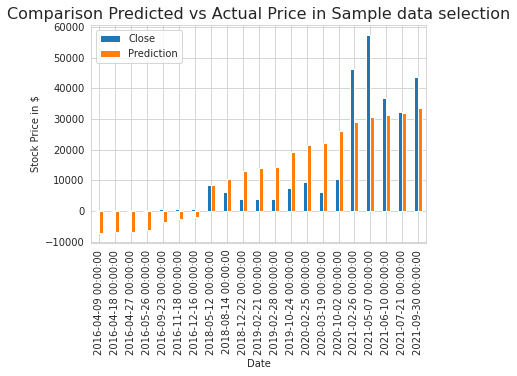

In [ ]:
plt.figure(figsize=(16,8))
df_sample.plot(x='Date', y=['Close', 'Prediction'], kind='bar')
# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)
# Set x label
plt.xlabel('Date')
# Set y label
plt.ylabel('Stock Price in $')
# Show plot
plt.show()

<h3>observations:

- We can see some larger variations between predicted and actual values in the random sample.

<h3> Let's see how the model performed over the whole test data set.

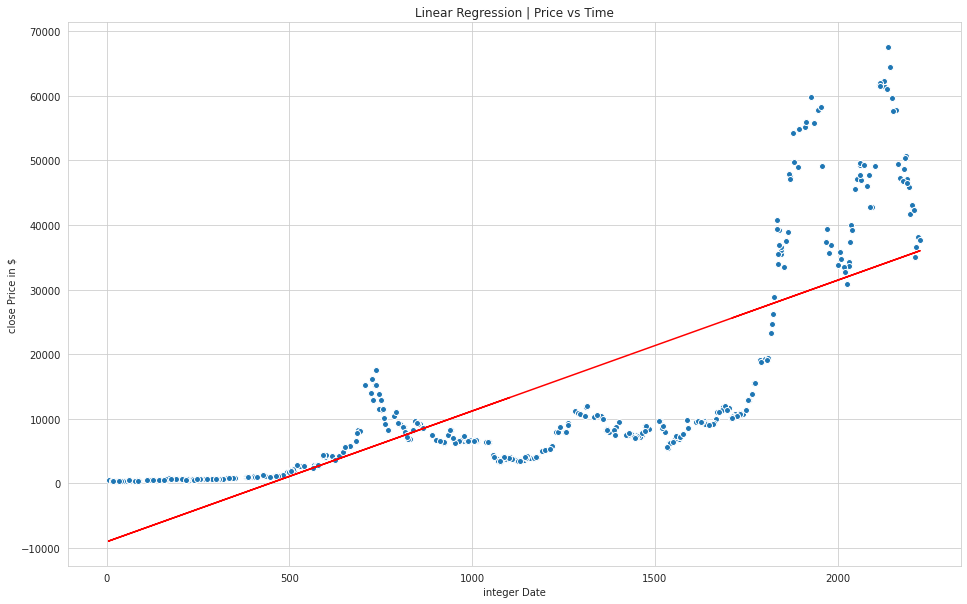

In [ ]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('integer Date')
plt.ylabel('close Price in $')

plt.show()

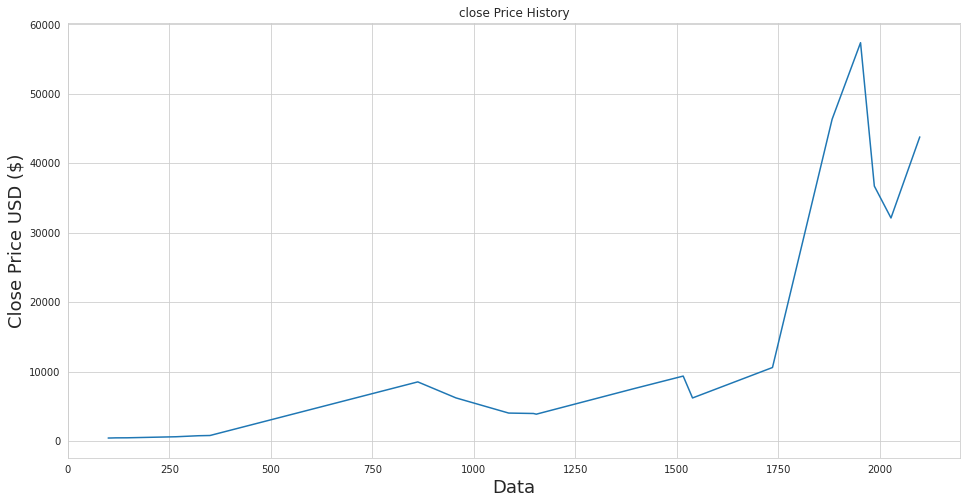

In [ ]:
plt.figure(figsize=(16,8))
plt.title('close Price History')
plt.plot(df_sample['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

<h2>Error Evaluation Metrics

In [ ]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8457.102685895494
Mean Squared Error: 111176468.86027126
Root Mean Squared Error: 10544.025268381676


In [ ]:
print('Model R^2 Square value', metrics.r2_score(y_test, y_pred))

Model R^2 Square value 0.5945867279273416


<h1>Taking Whole Dataset and predicting Close value:

In [35]:
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [36]:
final_df['Mean_of_Numerical_column'] = final_df[['Open','Close','High','Low','Adj Close','Volume']].mean(axis=1)
final_df['Median_of_Numerical_column'] = final_df[['Open','Close','High','Low','Adj Close','Volume']].median(axis=1)
final_df['Std_dev_of_Numerical_column'] = final_df[['Open','Close','High','Low','Adj Close','Volume']].std(axis=1)

In [37]:
#High low difference 
final_df['H-L']=final_df['High']-final_df['Low']
#stock close open difference
final_df['C-O']=final_df['Close']-final_df['Open']

In [38]:
final_df.head()

,Open,High,Low,Close,Adj Close,Volume,Mean_of_Numerical_column,Median_of_Numerical_column,Std_dev_of_Numerical_column,H-L,C-O
Date,,,,,,,,,,,
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900,6.046844e+06,434.334015,1.481062e+07,8.730987,3.613007
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600,5.016462e+06,434.029999,1.228671e+07,4.192017,-1.184021
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800,6.605992e+06,431.794495,1.618026e+07,9.037017,-3.567017
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500,6.413277e+06,433.091003,1.570820e+07,5.432983,3.029998
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600,5.754127e+06,432.514496,1.409362e+07,4.506012,-1.109009


In [39]:
final_df.shape

(2226, 11)

In [56]:
final_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Mean_of_Numerical_column', 'Median_of_Numerical_column',
       'Std_dev_of_Numerical_column', 'H-L', 'C-O'],
      dtype='object')

In [60]:
x = final_df.iloc[:, 0:11].values
y = final_df.iloc[:, 4].values

In [61]:
x.shape

(2226, 11)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,  random_state=0)

In [63]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1780, 11)
(446, 11)
(1780,)
(446,)


In [64]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

<h1> Linear Regression:

In [100]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(x_train, y_train)

LinearRegression()

In [102]:
Y_pred = clf.predict(x_test)

In [103]:
predictions = pd.DataFrame({"Close price Predictions": Y_pred}, index=pd.date_range(start=final_df.index[-1], periods=len(Y_pred), freq="D"))
predictions.head()

,Close price Predictions
2022-02-04,4025.229004
2022-02-05,39747.503906
2022-02-06,19246.644531
2022-02-07,2228.409912
2022-02-08,8827.764648


In [104]:
oneyear_df = pd.DataFrame(predictions[:365])#one year predictions

In [106]:
oneyear_df.head()

,Close price Predictions
2022-02-04,4025.229004
2022-02-05,39747.503906
2022-02-06,19246.644531
2022-02-07,2228.409912
2022-02-08,8827.764648


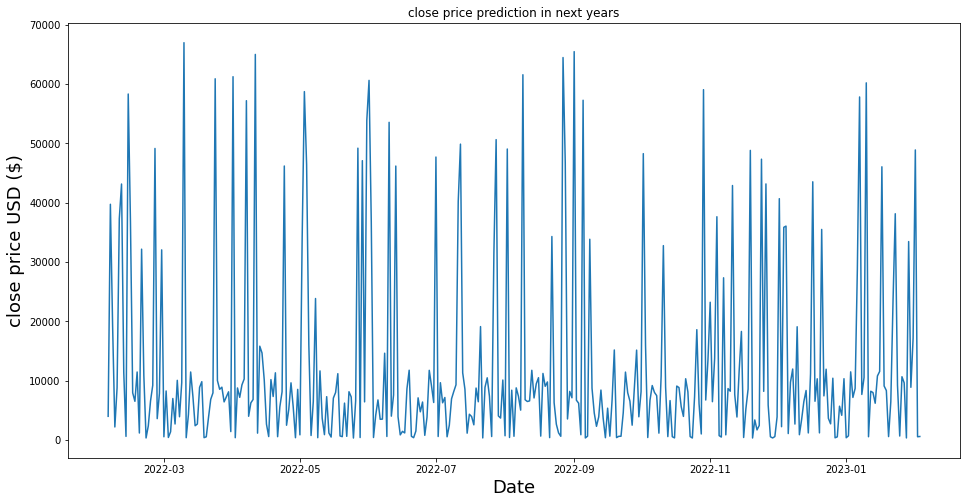

In [105]:
plt.figure(figsize=(16,8))
plt.title('close price prediction in next years')
plt.plot(oneyear_df['Close price Predictions'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price USD ($)', fontsize=18)
plt.show()

In [108]:
buying_stock = oneyear_df[oneyear_df['Close price Predictions'] == min(oneyear_df['Close price Predictions'])]
buying_stock

,Close price Predictions
2022-05-25,364.330994


In [109]:
selling_stock = oneyear_df[oneyear_df['Close price Predictions'] == max(oneyear_df['Close price Predictions'])]
selling_stock

,Close price Predictions
2022-03-10,66971.828125


In [111]:
print("Buying the stock in next year where the price is lowest:",oneyear_df["Close price Predictions"].min())

Buying the stock in next year where the price is lowest: 364.3309940000054


In [110]:
print("selling the stock in next year where the price is highest:",oneyear_df["Close price Predictions"].max())

selling the stock in next year where the price is highest: 66971.828125


In [112]:
onemonth_df = pd.DataFrame(predictions[:31])#one month predictions
onemonth_df.head()

,Close price Predictions
2022-02-04,4025.229004
2022-02-05,39747.503906
2022-02-06,19246.644531
2022-02-07,2228.409912
2022-02-08,8827.764648


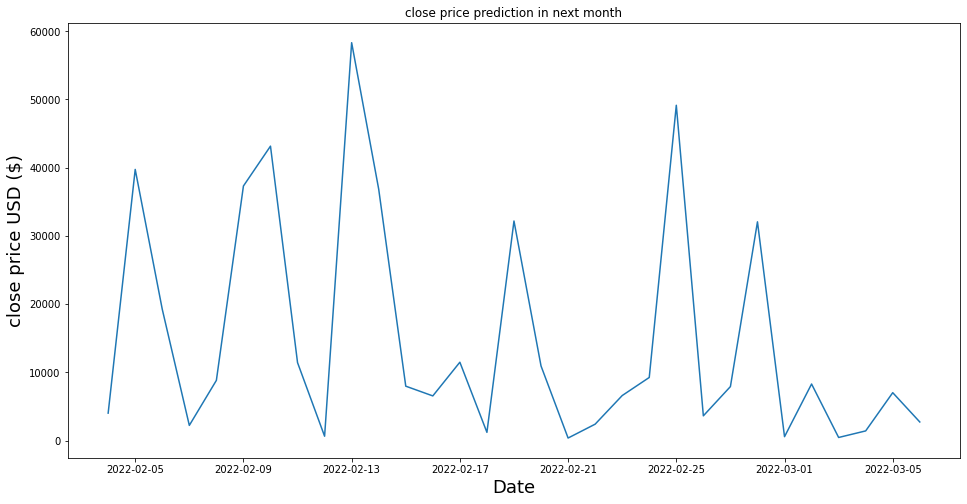

In [113]:
plt.figure(figsize=(16,8))
plt.title('close price prediction in next month')
plt.plot(onemonth_df['Close price Predictions'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price USD ($)', fontsize=18)
plt.show()

In [114]:
buying_stock = onemonth_df[onemonth_df['Close price Predictions'] == min(onemonth_df['Close price Predictions'])]
buying_stock

,Close price Predictions
2022-02-21,376.028992


In [115]:
selling_stock = onemonth_df[onemonth_df['Close price Predictions'] == max(onemonth_df['Close price Predictions'])]
selling_stock

,Close price Predictions
2022-02-13,58323.953125


<h1>Random Forest:

In [65]:
model = RandomForestRegressor()
params = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int)
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=params, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 9}


In [66]:
clf = RandomForestRegressor(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_depth=9)
clf.fit(x_train, y_train)

RandomForestRegressor(max_depth=9, n_estimators=1000)

In [67]:
forest_predict = clf.predict(x_test)

<H1>Evaluating Performance:

In [69]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, forest_predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, forest_predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, forest_predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, forest_predict), 4))
print(f'Train Score : {clf.score(x_train, y_train) * 100:.2f}% and Test Score : {clf.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(forest_predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 37.114
Mean Squared Error: 23793.5745
Root Mean Squared Error: 154.2517
(R^2) Score: 0.9999
Train Score : 100.00% and Test Score : 99.99% using Random Tree Regressor.
Accuracy: 99.65 %.


In [71]:
predictions = pd.DataFrame({"Close price Predictions": forest_predict}, index=pd.date_range(start=final_df.index[-1], periods=len(forest_predict), freq="D"))

In [72]:
predictions.head()

,Close price Predictions
2022-02-04,4022.137695
2022-02-05,39773.985863
2022-02-06,19202.986945
2022-02-07,2159.397519
2022-02-08,8822.816407


In [73]:
oneyear_df1 = pd.DataFrame(predictions[:365])#one year predictions

In [74]:
oneyear_df1.head()

,Close price Predictions
2022-02-04,4022.137695
2022-02-05,39773.985863
2022-02-06,19202.986945
2022-02-07,2159.397519
2022-02-08,8822.816407


In [75]:
oneyear_df1.shape

(365, 1)

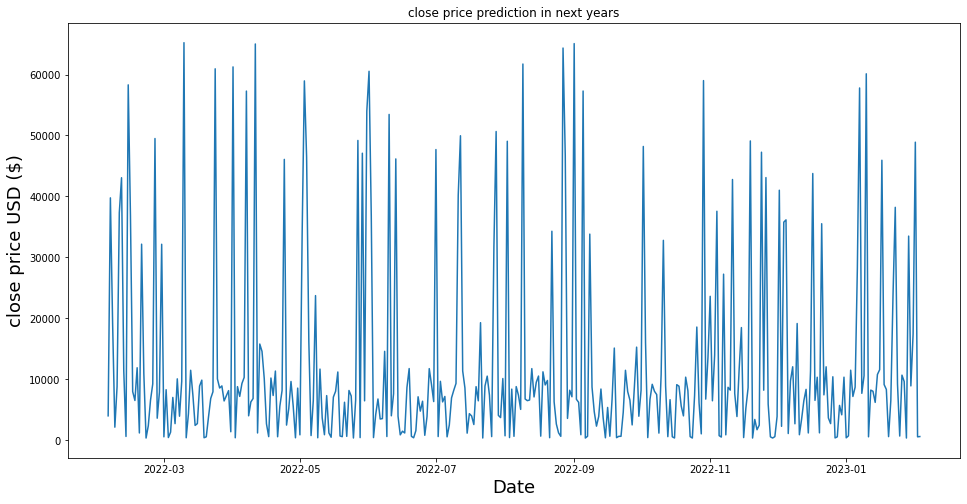

In [76]:
plt.figure(figsize=(16,8))
plt.title('close price prediction in next years')
plt.plot(oneyear_df1['Close price Predictions'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price USD ($)', fontsize=18)
plt.show()

In [91]:
buying_stock = oneyear_df1[oneyear_df1['Close price Predictions'] == min(oneyear_df1['Close price Predictions'])]
buying_stock

,Close price Predictions
2022-11-20,379.216768


In [92]:
selling_stock = oneyear_df1[oneyear_df1['Close price Predictions'] == max(oneyear_df1['Close price Predictions'])]
selling_stock

,Close price Predictions
2022-03-10,65222.789653


In [77]:
print("Buying the stock in next year where the price is lowest:",oneyear_df1["Close price Predictions"].min())

Buying the stock in next year where the price is lowest: 379.2167684074662


In [96]:
onemonth_df1 = pd.DataFrame(predictions[:31])#one month predictions
onemonth_df1.head()

,Close price Predictions
2022-02-04,4022.137695
2022-02-05,39773.985863
2022-02-06,19202.986945
2022-02-07,2159.397519
2022-02-08,8822.816407


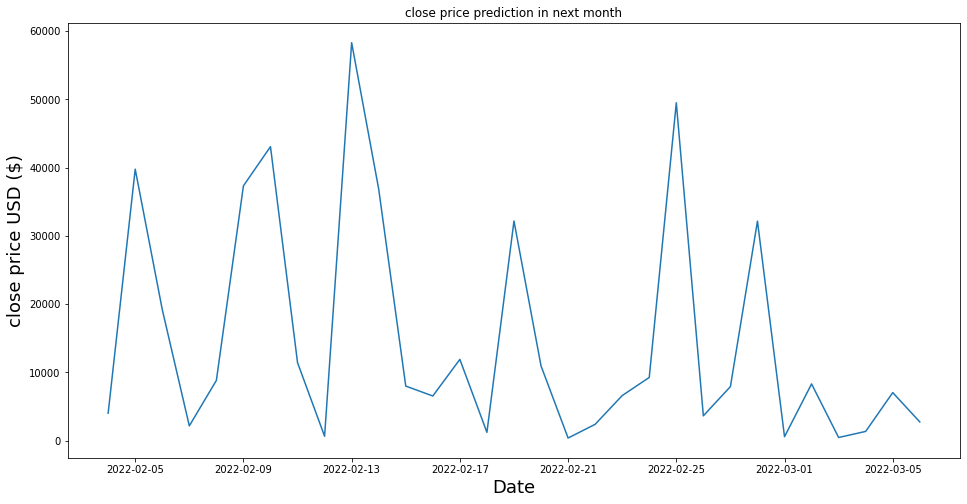

In [97]:
plt.figure(figsize=(16,8))
plt.title('close price prediction in next month')
plt.plot(onemonth_df1['Close price Predictions'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price USD ($)', fontsize=18)
plt.show()

In [98]:
buying_stock = onemonth_df1[onemonth_df1['Close price Predictions'] == min(onemonth_df1['Close price Predictions'])]
buying_stock

,Close price Predictions
2022-02-21,379.260921


In [99]:
selling_stock = onemonth_df1[onemonth_df1['Close price Predictions'] == max(onemonth_df1['Close price Predictions'])]
selling_stock

,Close price Predictions
2022-02-13,58306.682595


<h1>Xgboost Regressor:

In [117]:
#Importing Packages
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [118]:
xgb_model = XGBRegressor()
param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500]
    }

rscv = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_tuning, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[06:22:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'subsample': 0.7, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.7}


In [119]:
clf = XGBRegressor(n_estimators=200, min_child_weight=1, colsample_bytree=0.7, max_depth=5)
clf.fit(x_train, y_train)

[06:32:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.7, max_depth=5, n_estimators=200)

In [120]:
xgb_predict = clf.predict(x_test)

<H1>Evaluating Performance:

In [122]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, xgb_predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, xgb_predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, xgb_predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, xgb_predict), 4))
print(f'Train Score : {clf.score(x_train, y_train) * 100:.2f}% and Test Score : {clf.score(x_test, y_test) * 100:.2f}% using xgboost Regressor.')
errors = abs(xgb_predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 68.0359
Mean Squared Error: 43982.1895
Root Mean Squared Error: 209.7193
(R^2) Score: 0.9998
Train Score : 100.00% and Test Score : 99.98% using xgboost Regressor.
Accuracy: 99.4 %.


In [123]:
predictions = pd.DataFrame({"Close price Predictions": xgb_predict}, index=pd.date_range(start=final_df.index[-1], periods=len(xgb_predict), freq="D"))

In [124]:
predictions.head()

,Close price Predictions
2022-02-04,4017.733887
2022-02-05,39981.187500
2022-02-06,19184.546875
2022-02-07,2139.088135
2022-02-08,8851.805664


In [125]:
oneyear_df2 = pd.DataFrame(predictions[:365])#one year predictions

In [126]:
oneyear_df2.head()

,Close price Predictions
2022-02-04,4017.733887
2022-02-05,39981.187500
2022-02-06,19184.546875
2022-02-07,2139.088135
2022-02-08,8851.805664


In [127]:
oneyear_df2.shape

(365, 1)

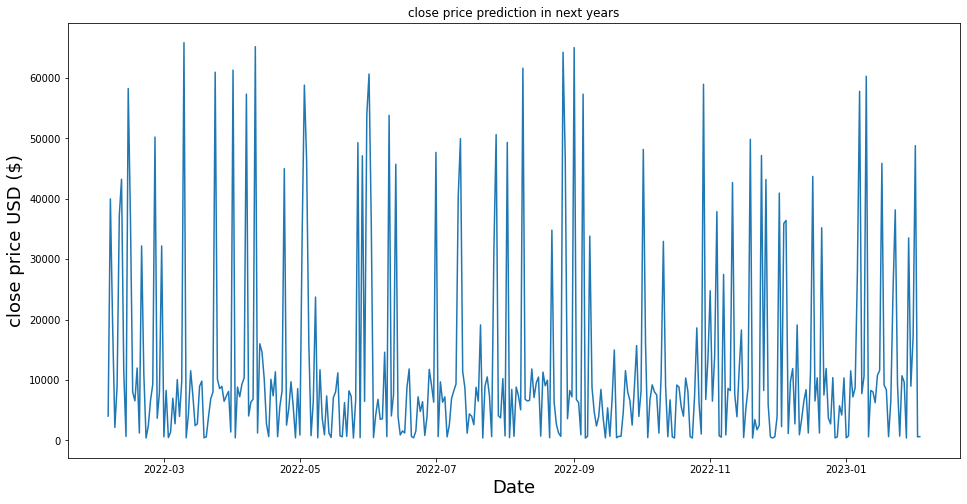

In [128]:
plt.figure(figsize=(16,8))
plt.title('close price prediction in next years')
plt.plot(oneyear_df2['Close price Predictions'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price USD ($)', fontsize=18)
plt.show()

In [129]:
buying_stock = oneyear_df2[oneyear_df2['Close price Predictions'] == min(oneyear_df2['Close price Predictions'])]
buying_stock

,Close price Predictions
2022-02-21,383.598053
2022-07-22,383.598053
2022-09-06,383.598053
2022-10-24,383.598053
2022-11-20,383.598053
2022-11-29,383.598053
2023-01-28,383.598053


In [130]:
selling_stock = oneyear_df2[oneyear_df2['Close price Predictions'] == max(oneyear_df2['Close price Predictions'])]
selling_stock

,Close price Predictions
2022-03-10,65845.226562


In [131]:
print("Buying the stock in next year where the price is lowest:",oneyear_df2["Close price Predictions"].min())

Buying the stock in next year where the price is lowest: 383.5980529785156


In [132]:
onemonth_df2 = pd.DataFrame(predictions[:31])#one month predictions
onemonth_df2.head()

,Close price Predictions
2022-02-04,4017.733887
2022-02-05,39981.187500
2022-02-06,19184.546875
2022-02-07,2139.088135
2022-02-08,8851.805664


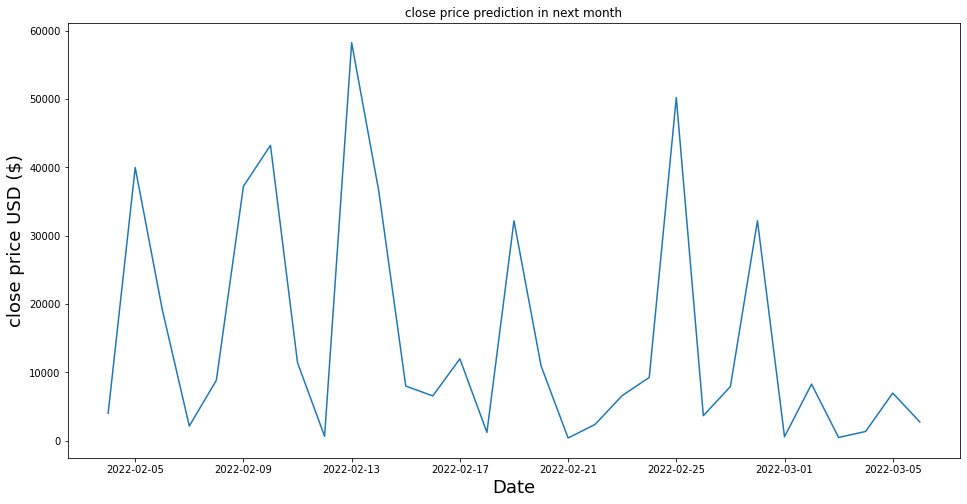

In [133]:
plt.figure(figsize=(16,8))
plt.title('close price prediction in next month')
plt.plot(onemonth_df2['Close price Predictions'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price USD ($)', fontsize=18)
plt.show()

In [134]:
buying_stock = onemonth_df2[onemonth_df2['Close price Predictions'] == min(onemonth_df2['Close price Predictions'])]
buying_stock

,Close price Predictions
2022-02-21,383.598053


In [135]:
selling_stock = onemonth_df2[onemonth_df2['Close price Predictions'] == max(onemonth_df2['Close price Predictions'])]
selling_stock

,Close price Predictions
2022-02-13,58256.554688
